In [ ]:
from google.colab import files
uploaded = files.upload()


Saving watermarked_preview.mp4 to watermarked_preview.mp4


In [ ]:
import cv2
import os

# Создание директории для сохранения кадров
dir_name = 'pictures'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)
    print('Директория', dir_name, 'создана')
else:
    print('Директория', dir_name, 'уже существует')

Директория pictures уже существует


In [ ]:
import os
import shutil

# перемещение файла в директорию
shutil.move('/content/watermarked_preview.mp4', "/content/pictures")

'/content/pictures/watermarked_preview.mp4'

In [ ]:
# Путь к видеофайлу
video_filename = '/content/pictures/watermarked_preview.mp4'

# Открытие видеофайла
cap = cv2.VideoCapture(video_filename)

frame_counter = 0
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        # Ресайз до 320x320
        resized_frame = cv2.resize(frame, (320, 320))

        # Сохранение нового формата кадра
        frame_filename = os.path.join(dir_name, f'frame{frame_counter:04d}.jpg')
        cv2.imwrite(frame_filename, resized_frame)

        frame_counter += 1
    else:
        break

cap.release()
cv2.destroyAllWindows()

# Считаем количество файлов и общий объем
file_list = os.listdir(dir_name)
file_count = len(file_list)
print(f'Количество файлов в папке: {file_count}')

total_size = 0
for filename in file_list:
    file_path = os.path.join(dir_name, filename)
    total_size += os.path.getsize(file_path)

print(f'Общий объем файлов: {total_size / (1024 * 1024):.2f} MB')


Количество файлов в папке: 299
Общий объем файлов: 22.92 MB


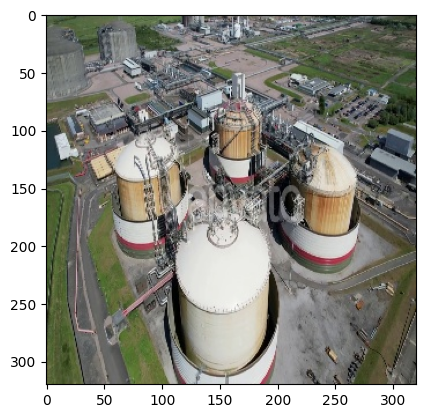

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image

#смотрим, что получилось на случайном кадре
folder_path = '/content/pictures'
files = os.listdir(folder_path)
random_file = random.choice(files)

image = Image.open(os.path.join(folder_path, random_file))
plt.imshow(image)
plt.show()

In [ ]:
# размещение аннотаций, тут они одинаковые
image_folder = '/content/pictures'
category = 'индустриальный'
annotation_file = 'annotation.csv'

with open(annotation_file, 'w') as file:
  for image in os.listdir(image_folder):
    file.write(f'{image}, {category}\n')
print('Размещение аннотаций завершено')

Размещение аннотаций завершено


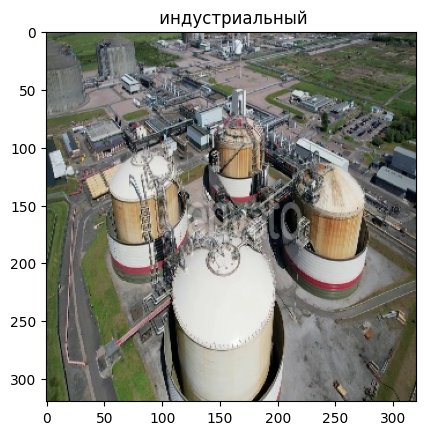

In [ ]:
#смотрим на файл с аннотацией
import pandas as pd
import matplotlib.image as mping
annotation_file = 'annotation.csv'
df = pd.read_csv(annotation_file, header=None, names=['filename','category'])

random_frame = df.sample(n=1)
image_folder = '/content/pictures'

file_path = os.path.join(image_folder, random_frame['filename'].values[0])
img = mping.imread(file_path)

plt.imshow(img)
plt.title(random_frame['category'].values[0])
plt.show()
